In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from collections import Counter

In [57]:
df = pd.read_csv('amazon_baby.csv')
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [60]:
df = df[df['rating']!= 3]

In [61]:
df['sentiment'] = df['rating'] >= 4

In [63]:
df['sentiment'] = df['sentiment'].astype(int)

In [65]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [218]:
df.head(3)

,name,review,rating,sentiment,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count,word_count
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."


In [237]:
df = df.dropna()
df.head(3)

,name,review,rating,sentiment,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count,word_count
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."


In [323]:
## count word
df['word_count'] = df['review'].apply(lambda x: Counter(x.replace(',','').replace('.','').
                                                        replace('?','').replace('!','').split()))

In [74]:
x = df.iloc[:, 4:]
x.head()

,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
y = df.iloc[:, 3]
y.head()

1    1
2    1
3    1
4    1
5    1
Name: sentiment, dtype: int32

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [77]:
x_train.head(3)

,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count
137075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
y_train.head(3)

137075    1
30875     1
43006     1
Name: sentiment, dtype: int32

In [79]:
print(x_train.shape)
print(y_train.shape
     )

(132543, 11)
(132543,)


In [80]:
model = sklearn.linear_model.LogisticRegression()

In [81]:
model.fit(x_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
model.fit(x_train.values, y_train.values)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
model.coef_

array([[ 1.13200107,  0.75580025,  0.83012714,  0.9989916 ,  1.19828   ,
        -2.18549349, -0.98426876, -1.97530364, -1.82929238, -0.53681013,
        -0.761102  ]])

In [83]:
model.coef_.sort()

In [391]:
model.coef_

array([[-2.18549349, -1.97530364, -1.82929238, -0.98426876, -0.761102  ,
        -0.53681013,  0.75580025,  0.83012714,  0.9989916 ,  1.13200107,
         1.19828   ]])

In [392]:
predictions = model.predict(x_test)

In [393]:
model.score(x_test, y_test)

0.5923768710767745

In [93]:
from sklearn import metrics
import seaborn as sns

In [96]:
cm = metrics.confusion_matrix(y_test, predictions)

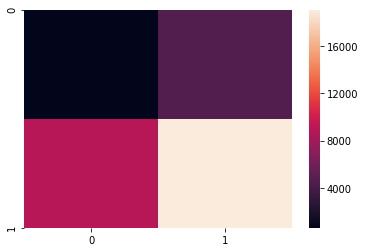

In [98]:
sns.heatmap(cm)

# task 4

In [379]:
diaper_champ_reviews = df[df['name']=='Baby Trend Diaper Champ']

In [380]:
diaper_champ_reviews.shape

(298, 16)

In [381]:
diaper_champ_reviews = diaper_champ_reviews.dropna()
diaper_champ_reviews.shape

(298, 16)

In [382]:
diaper_champ_reviews.head(1)

,name,review,rating,sentiment,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count,word_count
312,Baby Trend Diaper Champ,Ok - newsflash. Diapers are just smelly. We\...,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Ok': 1, '-': 3, 'newsflash': 1, 'Diapers': 1..."


In [242]:
champ_x = diaper_champ_reviews['word_count']
champ_y = diaper_champ_reviews['sentiment']

In [248]:
champ_x.head()

312    {'Ok': 1, '-': 3, 'newsflash.': 1, 'Diapers': ...
314    {'My': 1, 'husband': 1, 'and': 8, 'I': 2, 'sel...
315    {'Excellent': 1, 'diaper': 1, 'disposal': 1, '...
316    {'We': 1, 'love': 1, 'our': 2, 'diaper': 4, 'c...
317    {'Two': 1, 'girlfriends': 1, 'and': 11, 'two':...
Name: word_count, dtype: object

In [249]:
champ_y.head()

312    1
314    0
315    1
316    1
317    1
Name: sentiment, dtype: int32

In [287]:
print(champ_x_train.shape, champ_x_test.shape, champ_y_train.shape, champ_y_test.shape)

(238,) (60,) (238,) (60,)


In [288]:
allword_model = LogisticRegression()

In [289]:
from sklearn.feature_extraction import DictVectorizer

In [304]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df['word_count'],df['sentiment'], train_size=0.8,random_state=0)

In [355]:
df_x_train

137075    {'This': 1, 'is': 5, 'an': 1, 'adorable': 1, '...
30875     {'I\'ve': 2, 'purchase': 1, '3': 1, 'of': 1, '...
43006     {'Unlike': 1, 'most': 1, 'reviewers,': 1, 'I':...
122472    {'I': 4, 'bought': 1, 'this': 1, 'cup': 3, 'fo...
21184     {'We': 1, 'purchased': 2, 'this': 1, 'thinking...
                                ...                        
108099    {'My': 1, 'husband': 1, 'and': 5, 'I': 2, 'pic...
106237    {'Very': 2, 'cheaply': 1, 'made.': 1, 'Compare...
168698    {'My': 2, 'husband': 2, 'and': 13, 'I': 10, 'j...
130592    {'This': 1, 'crib': 1, 'mattress': 1, 'pad': 1...
48275     {'First': 1, 'colors': 1, 'are': 2, 'shining,'...
Name: word_count, Length: 132543, dtype: object

In [356]:
dictver = DictVectorizer()
df_x_train_dict = dictver.fit_transform(df_x_train)
df_x_test_dict = dictver.fit_transform(df_x_test)

In [307]:
# 全局的训练
allword_model.fit(df_x_train_dict,df_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [309]:
allword_model.score(df_x_test_dict,champ_y_test)

ValueError: X has 97144 features per sample; expecting 243849

特定产品所有词模型


In [367]:
temp = diaper_champ_reviews

In [348]:
champ_train, champ_test = train_test_split(diaper_champ_reviews, train_size=0.8,random_state=0)

In [349]:
champ_train['word_count']

629    {'THis': 1, 'thing': 1, 'works': 1, 'There': 1...
402    {'I': 4, 'love': 1, 'my': 1, 'Diaper': 1, 'Cha...
432    {'I': 2, 'love': 1, 'the': 3, 'Diaper': 2, 'Ch...
497    {'I': 2, 'have': 1, 'a': 4, 'two-year-old': 1,...
558    {'While': 1, 'the': 2, 'diaper': 2, 'champ': 1...
                             ...                        
595    {'Over': 1, 'the': 4, 'past': 1, 'several': 1,...
525    {'I': 3, 'laughed': 1, 'when': 1, 'my': 1, 'hu...
441    {'i': 3, 'love': 1, 'this': 1, 'diaper': 5, 'c...
364    {'We': 1, 'originally': 1, 'registered': 1, 'a...
502    {'My': 1, 'baby\'s': 1, 'room': 1, 'has': 1, '...
Name: word_count, Length: 238, dtype: object

In [368]:
baby_model = LogisticRegression()

In [369]:
dictver_b = DictVectorizer()
temp_dict = dictver_b.fit_transform(temp['word_count'])

In [370]:
baby_model.fit(temp_dict, temp['sentiment'])

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [373]:
allword_model.predict_proba(temp_dict)

ValueError: X has 3606 features per sample; expecting 243849

## 上述为所有词模型

## 下面为选定词模型

In [400]:
diaper_champ_reviews.sort_values(by=['rating'], ascending=False, inplace=True) 
diaper_champ_reviews.head(3)

,name,review,rating,sentiment,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count,word_count
644,Baby Trend Diaper Champ,I see that there are complaints of stinkiness ...,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'I': 2, 'see': 1, 'that': 1, 'there': 1, 'are..."
461,Baby Trend Diaper Champ,"After using this for 3 years, I still stunned ...",5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'After': 1, 'using': 3, 'this': 1, 'for': 2, ..."
462,Baby Trend Diaper Champ,I loved this compared to the genie. It is easi...,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'I': 1, 'loved': 1, 'this': 1, 'compared': 1,..."


In [397]:
diaper_champ_reviews_x = diaper_champ_reviews.iloc[:, 4:-1]
diaper_champ_reviews_x.head()

,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count
644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [409]:
diaper_champ_reviews['predicted_sentiment'] = model.predict_proba(diaper_champ_reviews_x)[:, 1]
diaper_champ_reviews.head(3)

,name,review,rating,sentiment,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count,word_count,predicted_sentiment
644,Baby Trend Diaper Champ,I see that there are complaints of stinkiness ...,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'I': 2, 'see': 1, 'that': 1, 'there': 1, 'are...",0.784526
461,Baby Trend Diaper Champ,"After using this for 3 years, I still stunned ...",5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'After': 1, 'using': 3, 'this': 1, 'for': 2, ...",0.784526
462,Baby Trend Diaper Champ,I loved this compared to the genie. It is easi...,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'I': 1, 'loved': 1, 'this': 1, 'compared': 1,...",0.576390


In [418]:
diaper_champ_reviews.sort_values(by=['predicted_sentiment'], ascending=False, inplace=True)
diaper_champ_reviews

,name,review,rating,sentiment,awesome_count,great_count,fantastic_count,amazing_count,love_count,horrible_count,bad_count,terrible_count,awful_count,wow_count,hate_count,word_count,predicted_sentiment
323,Baby Trend Diaper Champ,When shopping around for a diaper pail I was d...,2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'When': 1, 'shopping': 1, 'around': 1, 'for':...",0.962541
472,Baby Trend Diaper Champ,I\'ve given this can as a gift a few times now...,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'I\'ve': 1, 'given': 1, 'this': 1, 'can': 1, ...",0.962541
441,Baby Trend Diaper Champ,i love this diaper champ..not only does it sav...,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,"{'i': 3, 'love': 1, 'this': 1, 'diaper': 5, 'c...",0.923475
471,Baby Trend Diaper Champ,...make sure I tell people about this product....,5,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'make': 1, 'sure': 1, 'I': 7, 'tell': 1, 'peo...",0.923475
618,Baby Trend Diaper Champ,"Well, the first three months were odor free!! ...",2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Well': 1, 'the': 5, 'first': 1, 'three': 1, ...",0.885750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Baby Trend Diaper Champ,I have never written a review for Amazon but I...,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'I': 12, 'have': 2, 'never': 1, 'written': 1,...",0.065475
359,Baby Trend Diaper Champ,This is my first baby so I have nothing to com...,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"{'This': 1, 'is': 3, 'my': 2, 'first': 1, 'bab...",0.065475
590,Baby Trend Diaper Champ,This product is nice in theory but not all tha...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'This': 1, 'product': 1, 'is': 2, 'nice': 1, ...",0.053461
421,Baby Trend Diaper Champ,I find this product easy to operate. With any...,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'I': 1, 'find': 1, 'this': 1, 'product': 1, '...",0.031693


In [417]:
diaper_champ_reviews.loc[323]['review']

"When shopping around for a diaper pail I was drawn to the Diaper Champ for several reasons. 1) I loved the idea of using regular plastic bags from the grocery store. 2) The one-hand chute is quick and easy to use while dealing with a squirming baby. 3) I\\'d heard negative reviews about the Diaper Genie. Now that I\\'ve had the Diaper Champ for 8 months, I\\'m looking for a diaper pail that lives up to its name.About 2 months ago the chute began to stick and the pail began to release unpleasant fumes each time I\\'d drop a diaper in. The inner lining had come loose and was preventing diapers from dropping down into the bag. Eventually, the lining just fell out and that\\'s when the smell became unbearable. Not only is my daughter\\'s nursery filled with odors strong enough to give you a headache, the smell is seeping into the hall and down the stairs.Our Diaper Champ is on its way to the recycle bin. It won\\'t be returning for a come-back fight."

In [399]:
model.predict(diaper_champ_reviews.iloc[:, 4:-1])

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [376]:
model.score(diaper_champ_reviews.iloc[:, 4:],diaper_champ_reviews.iloc[:, 4:])

TypeError: float() argument must be a string or a number, not 'Counter'

In [375]:
diaper_champ_reviews['predicted_sentiment'] = model.predict_proba(diaper_champ_reviews.iloc[:, 4:])

TypeError: float() argument must be a string or a number, not 'Counter'

## 上述为选定词模型
